In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [8]:
meteorites = pd.read_csv("./data/meteorite-landings.csv", delimiter=",")
meteorites = meteorites.rename(columns={'name': 'Name', 'id': 'ID', 'nametype': 'Type', 'recclass': 'Class', 'mass': 'Mass', 'fall': 'Fell', 'year': 'Year', 'reclat': 'Latitude', 'reclong': 'Longitude'})

filtered_coords = (meteorites["Longitude"] >= -180) & (meteorites["Longitude"] <= 180) & ((meteorites["Longitude"] != 0) | (meteorites["Latitude"] != 0))
filtered_years = (meteorites["Year"] >= 860) & (meteorites["Year"] <= 2016)
filtered_mass = ~pd.isna(meteorites["Mass"])
filtered_type = ((meteorites["Type"] == "Valid"))
filtered_meteorites = meteorites[filtered_coords & filtered_years & filtered_type & filtered_mass]
filtered_meteorites.drop(["GeoLocation", "Type"], axis=1, inplace=True)
filtered_meteorites["Mass"] = filtered_meteorites["Mass"].div(1000) # convert gram to kilogram
filtered_meteorites.to_csv("./data/cleansed-data.csv")
filtered_meteorites = filtered_meteorites.sort_values(by="Year", ascending=True)
filtered_meteorites

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Name,ID,Class,Mass,Fell,Year,Latitude,Longitude
703,Nogata,16988,L6,0.4720,Fell,860.0,33.72500,130.75000
278,Elbogen,7823,"Iron, IID",107.0000,Fell,1399.0,50.18333,12.73333
852,Rivolta de Bassi,22614,Stone-uncl,0.1033,Fell,1490.0,45.48333,9.51667
283,Ensisheim,10039,LL6,127.0000,Fell,1491.0,47.86667,7.35000
5329,Campo del Cielo,5247,"Iron, IAB-MG",50000.0000,Found,1575.0,-27.46667,-60.58333
...,...,...,...,...,...,...,...,...
3403,Antelope,57455,H4,0.7540,Found,2012.0,40.90183,-118.54465
21698,Los Vientos 028,57338,H~5,12.1100,Found,2012.0,-24.68333,-69.76667
17386,Ksar Ghilane 010,55605,L5,0.0501,Found,2012.0,32.80600,9.83300
17252,Johannesburg,55765,H4,0.0630,Found,2012.0,35.37788,-117.63728


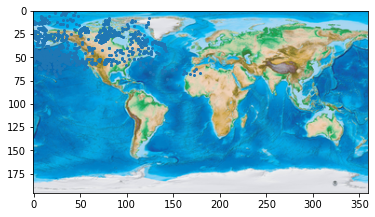

In [9]:
cleansed_meteorites = pd.read_csv("./data/cleansed-data.csv", delimiter=",")
img = Image.open("images/map.jpg")
img.thumbnail((360, 200), Image.ANTIALIAS)
ax = plt.subplot()
ax.scatter(cleansed_meteorites["Longitude"], cleansed_meteorites["Latitude"], s=4)
# plt.figure(figsize=(20,15))
ax.imshow(img)
plt.show()
# plt.savefig("./images/testplot.png", format="png")

In [10]:
# Meteorite landings across the world

fig = px.scatter_geo(filtered_meteorites,lat='Latitude',lon='Longitude',hover_name="Name",color="Mass",projection="natural earth")
fig.update_layout(title = 'Meteorite Landings Across the World', title_x=.5)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [11]:
# Figure of meteorite landings in the US

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = filtered_meteorites['Longitude'],
        lat = filtered_meteorites['Latitude'],
        text = "Mass " + filtered_meteorites['Mass'].astype(str),
        mode = 'markers',
        marker = dict(
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 0,
            color = filtered_meteorites['Mass'],
            cmax = filtered_meteorites['Mass'].max(),
            colorbar_title="Mass of Meteorites"
        )))
fig.update_layout(
        title = 'Meteorites in the US',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [12]:
# Calculates the the average meteorite mass per year

def GetAverageMeteoriteMass(year, number):
    sum = 0
    for i in range(len(filtered_meteorites)):
        if filtered_meteorites.iloc[i].Year == year:
            sum += filtered_meteorites.iloc[i].Mass
    return sum / number

filter_old = filtered_meteorites['Year'] > 1766
filtered_meteorites_per_year = filtered_meteorites[filter_old]
filtered_meteorites_per_year = filtered_meteorites_per_year['Year'].value_counts()
average_meteorite_mass_per_year = []
for i in range(len(filtered_meteorites_per_year.index)):
    year = filtered_meteorites_per_year.index[i]
    number = filtered_meteorites_per_year.values[i]
    print(GetAverageMeteoriteMass(year, number))
    average_meteorite_mass_per_year.append(GetAverageMeteoriteMass(year, number))
print(average_meteorite_mass_per_year)

0.15037849868593994
0.21167580827886714
0.42450996497372934
0.5498835278833976
0.5723339375830025
0.6517568438538205
1.9622287951807205
0.5320330276564779
0.7048613919129082
2.9460962899262926
1.7035308390243862
0.1715926024590163
0.519667404162103


In [ ]:
# Figure of the # of meteorites per year and their average mass

fig = px.scatter(filtered_meteorites_per_year,title="Number of Meteorites Per Year",
color=average_meteorite_mass_per_year,
labels={
    "index": "Year",
    "value": "Number of Meteorites",
    "color": "Average Mass"
}
)
fig.update_layout(showlegend=False)
fig.show()  